# OCR

In [2]:
import requests
from PIL import Image
from io import BytesIO

In [3]:
subscription_key = 'ad364518d66a4df09b7a510a85e42cbc'

In [4]:
vision_base_url = 'https://daegu0001.cognitiveservices.azure.com/vision/v2.0/'

In [5]:
#ocr은 computer vision의 하나의 기능이다
ocr_url = vision_base_url + 'ocr'

In [7]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/" + \
            "Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png"

![샘플이미지](https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Atomist_quote_from_Democritus.png/338px-Atomist_quote_from_Democritus.png)

In [9]:
image = Image.open(BytesIO(requests.get(image_url).content))

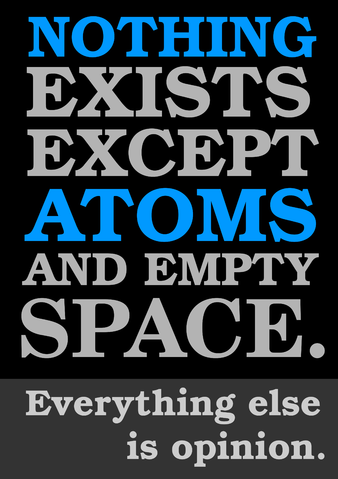

In [10]:
image

In [11]:
#heaers info set
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
#params info set
#unk: auto detect
#'detectOrientation': 'true': auto image orientation
params = {'language': 'unk', 'detectOrientation': 'true'}   
data = {'url': image_url}

지원하는 언어목록



- unk (AutoDetect)
- zh-Hans (ChineseSimplified)
- zh-Hant (ChineseTraditional)
- cs (Czech)
- da (Danish)
- nl (Dutch)
- en (English)
- fi (Finnish)
- fr (French)
- de (German)
- el (Greek)
- hu (Hungarian)
- it (Italian)
- ja (Japanese)
- ko (Korean)
- nb (Norwegian)
- pl (Polish)
- pt (Portuguese,
- ru (Russian)
- es (Spanish)
- sv (Swedish)
- tr (Turkish)
- ar (Arabic)
- ro (Romanian)
- sr-Cyrl (SerbianCyrillic)
- sr-Latn (SerbianLatin)
- sk (Slovak)

In [13]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)

In [14]:
analysis = response.json()

In [15]:
analysis

{'language': 'en',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '21,16,304,451',
   'lines': [{'boundingBox': '28,16,288,41',
     'words': [{'boundingBox': '28,16,288,41', 'text': 'NOTHING'}]},
    {'boundingBox': '27,66,283,52',
     'words': [{'boundingBox': '27,66,283,52', 'text': 'EXISTS'}]},
    {'boundingBox': '27,128,292,49',
     'words': [{'boundingBox': '27,128,292,49', 'text': 'EXCEPT'}]},
    {'boundingBox': '24,188,292,54',
     'words': [{'boundingBox': '24,188,292,54', 'text': 'ATOMS'}]},
    {'boundingBox': '22,253,297,32',
     'words': [{'boundingBox': '22,253,105,32', 'text': 'AND'},
      {'boundingBox': '144,253,175,32', 'text': 'EMPTY'}]},
    {'boundingBox': '21,298,304,60',
     'words': [{'boundingBox': '21,298,304,60', 'text': 'SPACE.'}]},
    {'boundingBox': '26,387,294,37',
     'words': [{'boundingBox': '26,387,210,37', 'text': 'Everything'},
      {'boundingBox': '249,389,71,27', 'text': 'else'}]},
    {'boundingBox': '127,431,198

In [21]:
#regions 안에 있는 lines의 내용들을 line_infos에 담았다
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []

#region이 여러 개일 경우를 위해 for문을 사용한다
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
            
word_infos

[{'boundingBox': '28,16,288,41', 'text': 'NOTHING'},
 {'boundingBox': '27,66,283,52', 'text': 'EXISTS'},
 {'boundingBox': '27,128,292,49', 'text': 'EXCEPT'},
 {'boundingBox': '24,188,292,54', 'text': 'ATOMS'},
 {'boundingBox': '22,253,105,32', 'text': 'AND'},
 {'boundingBox': '144,253,175,32', 'text': 'EMPTY'},
 {'boundingBox': '21,298,304,60', 'text': 'SPACE.'},
 {'boundingBox': '26,387,210,37', 'text': 'Everything'},
 {'boundingBox': '249,389,71,27', 'text': 'else'},
 {'boundingBox': '127,431,31,29', 'text': 'is'},
 {'boundingBox': '172,431,153,36', 'text': 'opinion.'}]

In [19]:
import matplotlib.pyplot as plt

(-0.5, 337.5, 478.5, -0.5)

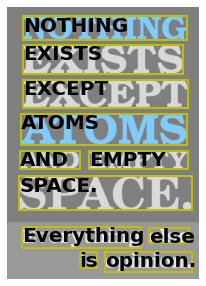

In [23]:
plt.figure(figsize=(5, 5))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    #split으로 좌표를 쪼개서 num에 넣었다
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = plt.Rectangle(origin, bbox[2], bbox[3], fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=20, weight="bold", va="top")
    
plt.axis("off")

In [24]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"

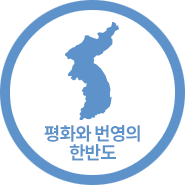

In [25]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [33]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'language': 'unk', 'detectOrientation': 'true'}   
data = {'url': image_url}

In [34]:
response = requests.post(ocr_url, headers=headers, params=params, json=data)

In [35]:
analysis = response.json()

In [36]:
analysis

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [37]:
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []

for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
            
word_infos

[{'boundingBox': '45,125,46,17', 'text': '평화와'},
 {'boundingBox': '95,125,45,17', 'text': '번영의'},
 {'boundingBox': '70,144,46,17', 'text': '한반도'}]